In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect,func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

### Inspect the data 

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

### columns of the tables

In [10]:
column_measurement=inspector.get_columns('measurement')
for c in column_measurement:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
column_station=inspector.get_columns('station')
for c in column_station:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


### glance of data in the table

In [12]:
data_measurement = engine.execute('SELECT * FROM measurement LIMIT (10)')
for record in data_measurement:
    print(record)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [13]:
data_station = engine.execute('SELECT * FROM station LIMIT (10)')
for record in data_station:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


### Design a query to retrieve the last 12 months of precipitation data and plot the results.

In [14]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [15]:
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
year_ago_date = recent_date - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
# only max prepcipitation for each day is shown in the graph
prcp_data = session.query(Measurement.date,func.max(Measurement.prcp)).\
    filter(func.strftime('%Y-%m-%d',Measurement.date) >= year_ago_date).\
    group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data,columns=['date','precipitation'])
prcp_df.set_index('date',inplace=True)
# Sort the dataframe by date
prcp_df.sort_values('date',inplace=True)
prcp_df.head()

,precipitation
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18


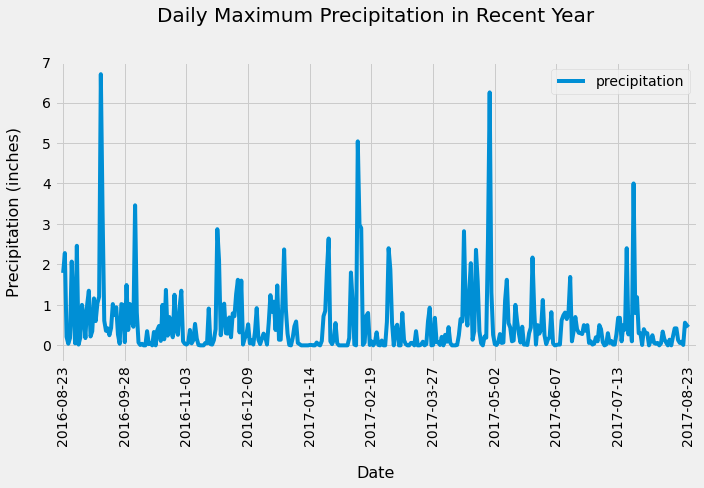

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize']=(10,7)
prcp_df.plot(kind = 'line',xticks=(0,36,72,108,144,180,216,252,288,324,365),rot = 90)
plt.xlim(-5,370)
plt.ylim(-0.4,7)
plt.xlabel('Date',fontsize=16,color='black',labelpad=20)
plt.ylabel('Precipitation (inches)',fontsize=16,color='black',labelpad=20)
plt.title('Daily Maximum Precipitation in Recent Year',fontsize=20,pad=40)
plt.tight_layout()
plt.show()

### Use Pandas to calcualte the summary statistics for the precipitation data

In [17]:
#Step 1:prepare data
prcp_all_data = session.query(Measurement.date,Measurement.prcp).\
    filter(func.strftime('%Y-%m-%d',Measurement.date) >= year_ago_date).\
    all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_all_df = pd.DataFrame(prcp_all_data,columns=['date','precipitation'])
prcp_all_df.set_index('date',inplace=True)
prcp_all_df.dropna(inplace=True)
# Sort the dataframe by date
prcp_all_df.sort_values('date',inplace=True)
prcp_all_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


In [18]:
#step 2: summary statstics
prcp_all_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
prcp_df.dropna(inplace=True)
len(prcp_df)

366

In [20]:
# Design a query to calculate the total number stations in the dataset
total_num_station = session.query(Station.id).count()
print(f'Total number of stations is {total_num_station}.')

Total number of stations is 9.


### Design a query to find the most active stations (i.e. what stations have the most rows?)

In [21]:
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
active_station_id = 'USC00519281'
print(f'Station {active_station_id} is the most active station.')

Station USC00519281 is the most active station.


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs = [Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
query_temp = session.query(*tobs).filter(Measurement.station == active_station_id).group_by(Measurement.station).all()
query_df = pd.DataFrame(query_temp,columns = ['station','lowest_temp','highest_temp','average_temp'])
query_df.set_index('station', inplace=True)
query_df

,lowest_temp,highest_temp,average_temp
station,,,
USC00519281,54.0,85.0,71.663781


In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_temp = session.query(Measurement.date,Measurement.tobs).\
    filter(func.strftime('%Y-%m-%d',Measurement.date) >= year_ago_date).\
    filter(Measurement.station == active_station_id).\
    all()
active_station_temp_df = pd.DataFrame(active_station_temp,columns=['date','temp'])
active_station_temp_df.set_index('date',inplace=True)
active_station_temp_df.sort_values('date',inplace=True)
active_station_temp_df.head()

,temp
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


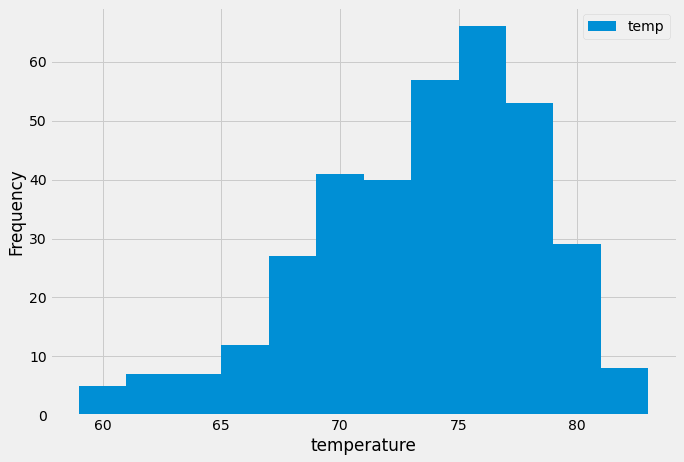

In [25]:
active_station_temp_df.plot(kind='hist',bins=12)
plt.xlabel('temperature')
plt.show()

# Close session

In [26]:
# Close Session
session.close()